# Train test split


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

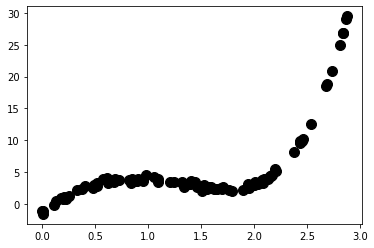

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [5]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 7.31174991e-01,  1.41379034e+00,  1.32071546e+00,  1.22818000e+01,
        1.25288865e+01,  6.13066128e+00,  4.95968217e-01,  6.01228575e+00,
        3.71215343e+00, -4.15790694e-02,  3.70145747e-02,  1.64548117e+00,
        1.26791808e+01,  2.06862107e+01,  2.59754505e+00,  4.07694535e+00,
        1.72865261e+00, -3.73789727e-02,  7.87976519e-02,  5.45918420e+00,
        2.37391624e+00,  9.42802206e-01,  7.65449307e+00,  1.05298507e-02,
        3.32907227e-01,  2.00250093e+01,  6.16908464e-01,  6.98380867e-01,
        2.09331665e+00,  2.04584003e+00,  2.12237266e+00,  1.67356641e+01,
        2.62094218e-01, -3.57784343e-02,  2.52408442e+00,  6.35821788e+00,
        1.22251344e+00,  2.40779538e+00,  5.37741526e+00,  3.54652704e-01])

In [6]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.7196601201390475
Explained variance score: 0.7196601201390475
Median absolute error: 2.811872043579533
Mean squared error: 11.41363799363141
Mean absolute errors: 2.7953539334218234


# Zadanie
Wylicz powyższe miary na zbiorze testowym dla wszystkich modeli nauczonych na trainie:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [8]:
degrees = [1, 2, 3, 4, 5, 25]
for degree in degrees:
  model = make_pipeline(PolynomialFeatures(degree), lm.LinearRegression())
  model.fit(X_train, y_train)
  print("degree", degree)
  print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
  print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
  print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
  print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

degree 1
Explained variance score: 0.7196601201390475
Median absolute error: 2.811872043579533
Mean squared error: 11.41363799363141
Mean absolute errors: 2.7953539334218234
degree 2
Explained variance score: 0.7196601201390475
Median absolute error: 2.811872043579533
Mean squared error: 11.41363799363141
Mean absolute errors: 2.7953539334218234
degree 3
Explained variance score: 0.7196601201390475
Median absolute error: 2.811872043579533
Mean squared error: 11.41363799363141
Mean absolute errors: 2.7953539334218234
degree 4
Explained variance score: 0.7196601201390475
Median absolute error: 2.811872043579533
Mean squared error: 11.41363799363141
Mean absolute errors: 2.7953539334218234
degree 5
Explained variance score: 0.7196601201390475
Median absolute error: 2.811872043579533
Mean squared error: 11.41363799363141
Mean absolute errors: 2.7953539334218234
degree 25
Explained variance score: 0.7196601201390475
Median absolute error: 2.811872043579533
Mean squared error: 11.41363799363